<a href="https://colab.research.google.com/github/ngcheeyuan/Tensorflow-Certification-Practice/blob/main/Binary_Alpha_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
import random

In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import callbacks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ds, ds_info = tfds.load('binary_alpha_digits',
                        with_info = True,
                        shuffle_files = True,
                        as_supervised = True
                        )

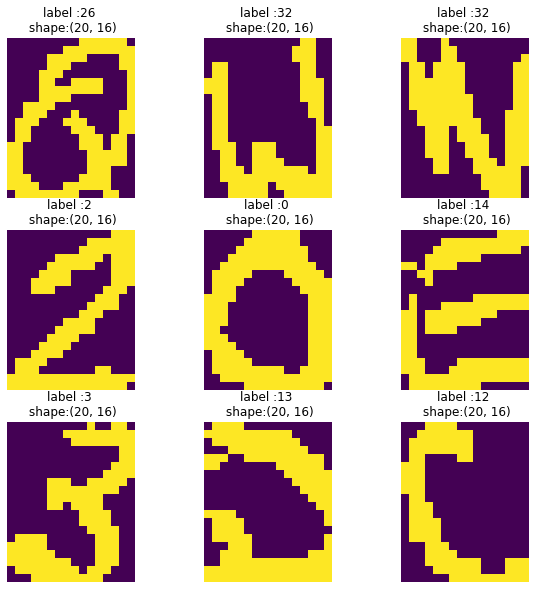

In [4]:
random_index = random.randint(0,len(ds['train'])-9)
example = ds['train'].skip(random_index).take(9)
plt.figure(figsize = (10,10))
for index,(image,label) in enumerate(example,1):
  plt.subplot(3,3,index)
  plt.imshow(image.numpy().squeeze())
  plt.axis(False)
  plt.title(f'label :{label} \n shape:{image.numpy().squeeze().shape}')

In [5]:
TEST_SIZE = 0.25
ds_train = ds['train'].take(int((1-TEST_SIZE)*len(ds['train'])))
ds_val = ds['train'].skip(int((1-TEST_SIZE)*len(ds['train'])))

In [6]:
image_list = []
label_list = []
for image , label in ds['train'].take(len(ds_train)):
  image_list.append(tf.cast(image,dtype = tf.float32))
  label_list.append(label.numpy())

In [7]:
image_list[0].shape

TensorShape([20, 16, 1])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val , y_train , y_val = train_test_split(image_list,
                                                    label_list,
                                                    test_size = 0.25,
                                                    shuffle = True,
                                                    stratify = label_list)

In [9]:
 from collections import Counter
 Counter(label_list)

Counter({0: 30,
         1: 29,
         2: 31,
         3: 32,
         4: 28,
         5: 28,
         6: 24,
         7: 34,
         8: 33,
         9: 29,
         10: 29,
         11: 32,
         12: 29,
         13: 28,
         14: 27,
         15: 25,
         16: 30,
         17: 30,
         18: 33,
         19: 29,
         20: 33,
         21: 28,
         22: 30,
         23: 26,
         24: 30,
         25: 27,
         26: 30,
         27: 24,
         28: 34,
         29: 31,
         30: 31,
         31: 23,
         32: 28,
         33: 34,
         34: 29,
         35: 25})

In [10]:
def dataset_prep(images,labels):
  image_data = tf.data.Dataset.from_tensor_slices(images)
  label_data = tf.data.Dataset.from_tensor_slices(labels)
  dataset = tf.data.Dataset.zip((image_data,label_data))
  dataset = dataset.batch(32).prefetch(tf.data.AUTOTUNE)

  return dataset

In [11]:
ds_train = dataset_prep(X_train,y_train)
ds_val = dataset_prep(X_val,y_val)

In [12]:
print(ds_train)
print(ds_val)

<PrefetchDataset shapes: ((None, 20, 16, 1), (None,)), types: (tf.float32, tf.int32)>
<PrefetchDataset shapes: ((None, 20, 16, 1), (None,)), types: (tf.float32, tf.int32)>


## Model 0: VGG Block

In [53]:
FILTERS = 10
KERNEL_SIZE = (2,2)
model = tf.keras.Sequential([
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           activation = 'relu', strides=(1,1), 
                                           padding='valid', 
                                           name = 'conv_1_1'),
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           activation = 'relu', strides=(1,1), 
                                           padding='valid', 
                                           name = 'conv_1_2'),
                             layers.MaxPooling2D(name = 'pool_1'),
                             layers.Dropout(0.25),
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           activation = 'relu', strides=(1,1), 
                                           padding='valid', 
                                           name = 'conv_2_1'),
                             layers.Conv2D(filters = FILTERS,
                                           kernel_size = KERNEL_SIZE,
                                           activation = 'relu', strides=(1,1), 
                                           padding='valid', 
                                           name = 'conv_2_2'),
                             layers.MaxPooling2D(name = 'pool_2'),
                             layers.BatchNormalization(),
                             layers.Dropout(0.25),                                      
                             layers.Flatten(),
                             layers.Dense(36,activation = 'softmax')
])

In [54]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'],
              optimizer = tf.keras.optimizers.Adam())

In [55]:
FILEPATH = 'model_checkpoints/'
history_0 = model.fit(ds_train,
                      epochs = 100,
                      validation_data = ds_val,
                      callbacks = [callbacks.EarlyStopping(monitor = 'val_loss',
                                                          patience = 10,
                                                          min_delta = 0.0001,
                                                          ),
                                  callbacks.ModelCheckpoint(filepath = FILEPATH,
                                                            save_best_only = True)]
                      )

Epoch 1/100
23/25 [==========================>...] - ETA: 0s - loss: 4.0897 - accuracy: 0.0367INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 4s 120ms/step - loss: 4.0783 - accuracy: 0.0342 - val_loss: 3.5734 - val_accuracy: 0.0530
Epoch 2/100
25/25 [==============================] - ETA: 0s - loss: 3.7196 - accuracy: 0.0558INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 94ms/step - loss: 3.7196 - accuracy: 0.0558 - val_loss: 3.5639 - val_accuracy: 0.0682
Epoch 3/100
25/25 [==============================] - ETA: 0s - loss: 3.5487 - accuracy: 0.0672INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 95ms/step - loss: 3.5487 - accuracy: 0.0672 - val_loss: 3.5564 - val_accuracy: 0.0720
Epoch 4/100
22/25 [=========================>....] - ETA: 0s - loss: 3.3135 - accuracy: 0.1122INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 98ms/step - loss: 3.3204 - accuracy: 0.1115 - val_loss: 3.5374 - val_accuracy: 0.0871
Epoch 5/100
21/25 [========================>.....] - ETA: 0s - loss: 3.2232 - accuracy: 0.1190INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 111ms/step - loss: 3.2156 - accuracy: 0.1242 - val_loss: 3.5086 - val_accuracy: 0.1288
Epoch 6/100
23/25 [==========================>...] - ETA: 0s - loss: 3.1049 - accuracy: 0.1386INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 97ms/step - loss: 3.1042 - accuracy: 0.1432 - val_loss: 3.4674 - val_accuracy: 0.1515
Epoch 7/100
25/25 [==============================] - ETA: 0s - loss: 2.9822 - accuracy: 0.1597INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 92ms/step - loss: 2.9822 - accuracy: 0.1597 - val_loss: 3.4137 - val_accuracy: 0.1780
Epoch 8/100
21/25 [========================>.....] - ETA: 0s - loss: 2.8841 - accuracy: 0.1920INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 93ms/step - loss: 2.8859 - accuracy: 0.1876 - val_loss: 3.3465 - val_accuracy: 0.2121
Epoch 9/100
21/25 [========================>.....] - ETA: 0s - loss: 2.7234 - accuracy: 0.2292INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 110ms/step - loss: 2.7221 - accuracy: 0.2307 - val_loss: 3.2566 - val_accuracy: 0.2348
Epoch 10/100
24/25 [===========================>..] - ETA: 0s - loss: 2.6100 - accuracy: 0.2695INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 95ms/step - loss: 2.6117 - accuracy: 0.2687 - val_loss: 3.1536 - val_accuracy: 0.2424
Epoch 11/100
21/25 [========================>.....] - ETA: 0s - loss: 2.5210 - accuracy: 0.2961INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 92ms/step - loss: 2.5242 - accuracy: 0.2915 - val_loss: 3.0463 - val_accuracy: 0.2992
Epoch 12/100
22/25 [=========================>....] - ETA: 0s - loss: 2.4191 - accuracy: 0.3139INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 111ms/step - loss: 2.4152 - accuracy: 0.3181 - val_loss: 2.9245 - val_accuracy: 0.3371
Epoch 13/100
22/25 [=========================>....] - ETA: 0s - loss: 2.3374 - accuracy: 0.3494INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 92ms/step - loss: 2.3464 - accuracy: 0.3422 - val_loss: 2.7823 - val_accuracy: 0.3598
Epoch 14/100
21/25 [========================>.....] - ETA: 0s - loss: 2.2801 - accuracy: 0.3527INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 95ms/step - loss: 2.2831 - accuracy: 0.3485 - val_loss: 2.6583 - val_accuracy: 0.4015
Epoch 15/100
21/25 [========================>.....] - ETA: 0s - loss: 2.2138 - accuracy: 0.3958INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 91ms/step - loss: 2.2270 - accuracy: 0.3853 - val_loss: 2.5228 - val_accuracy: 0.4091
Epoch 16/100
22/25 [=========================>....] - ETA: 0s - loss: 2.1553 - accuracy: 0.3722INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 111ms/step - loss: 2.1511 - accuracy: 0.3764 - val_loss: 2.4024 - val_accuracy: 0.4167
Epoch 17/100
21/25 [========================>.....] - ETA: 0s - loss: 2.1082 - accuracy: 0.3780INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 95ms/step - loss: 2.1142 - accuracy: 0.3853 - val_loss: 2.2829 - val_accuracy: 0.4356
Epoch 18/100
23/25 [==========================>...] - ETA: 0s - loss: 2.0207 - accuracy: 0.4117INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 93ms/step - loss: 2.0177 - accuracy: 0.4144 - val_loss: 2.1775 - val_accuracy: 0.4470
Epoch 19/100
21/25 [========================>.....] - ETA: 0s - loss: 2.0085 - accuracy: 0.4092INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 92ms/step - loss: 1.9889 - accuracy: 0.4119 - val_loss: 2.0666 - val_accuracy: 0.4545
Epoch 20/100
23/25 [==========================>...] - ETA: 0s - loss: 1.9469 - accuracy: 0.4185INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 109ms/step - loss: 1.9416 - accuracy: 0.4233 - val_loss: 1.9777 - val_accuracy: 0.4735
Epoch 21/100
21/25 [========================>.....] - ETA: 0s - loss: 1.8280 - accuracy: 0.4643INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 96ms/step - loss: 1.8313 - accuracy: 0.4651 - val_loss: 1.9443 - val_accuracy: 0.4848
Epoch 22/100
25/25 [==============================] - ETA: 0s - loss: 1.8408 - accuracy: 0.4550INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 101ms/step - loss: 1.8408 - accuracy: 0.4550 - val_loss: 1.8517 - val_accuracy: 0.4886
Epoch 23/100
24/25 [===========================>..] - ETA: 0s - loss: 1.7656 - accuracy: 0.4740INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 117ms/step - loss: 1.7641 - accuracy: 0.4753 - val_loss: 1.8164 - val_accuracy: 0.4924
Epoch 24/100
25/25 [==============================] - ETA: 0s - loss: 1.7282 - accuracy: 0.4867INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 95ms/step - loss: 1.7282 - accuracy: 0.4867 - val_loss: 1.8042 - val_accuracy: 0.4773
Epoch 25/100
22/25 [=========================>....] - ETA: 0s - loss: 1.7178 - accuracy: 0.5014INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 97ms/step - loss: 1.7030 - accuracy: 0.5019 - val_loss: 1.7339 - val_accuracy: 0.5114
Epoch 26/100
21/25 [========================>.....] - ETA: 0s - loss: 1.6654 - accuracy: 0.5149INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 93ms/step - loss: 1.6499 - accuracy: 0.5222 - val_loss: 1.7118 - val_accuracy: 0.4811
Epoch 27/100
21/25 [========================>.....] - ETA: 0s - loss: 1.6329 - accuracy: 0.5104INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 113ms/step - loss: 1.6359 - accuracy: 0.5006 - val_loss: 1.6811 - val_accuracy: 0.5000
Epoch 28/100
25/25 [==============================] - ETA: 0s - loss: 1.6154 - accuracy: 0.4892INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 95ms/step - loss: 1.6154 - accuracy: 0.4892 - val_loss: 1.6294 - val_accuracy: 0.5076
Epoch 29/100
25/25 [==============================] - 0s 16ms/step - loss: 1.5946 - accuracy: 0.5158 - val_loss: 1.6457 - val_accuracy: 0.5000
Epoch 30/100
22/25 [=========================>....] - ETA: 0s - loss: 1.5806 - accuracy: 0.5298INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 92ms/step - loss: 1.5874 - accuracy: 0.5222 - val_loss: 1.6116 - val_accuracy: 0.4962
Epoch 31/100
21/25 [========================>.....] - ETA: 0s - loss: 1.4930 - accuracy: 0.5625INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 95ms/step - loss: 1.4914 - accuracy: 0.5589 - val_loss: 1.5762 - val_accuracy: 0.5227
Epoch 32/100
25/25 [==============================] - 0s 15ms/step - loss: 1.4988 - accuracy: 0.5501 - val_loss: 1.6549 - val_accuracy: 0.5189
Epoch 33/100
25/25 [==============================] - ETA: 0s - loss: 1.4502 - accuracy: 0.5526INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 110ms/step - loss: 1.4502 - accuracy: 0.5526 - val_loss: 1.5338 - val_accuracy: 0.5341
Epoch 34/100
21/25 [========================>.....] - ETA: 0s - loss: 1.3979 - accuracy: 0.5670INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 99ms/step - loss: 1.4145 - accuracy: 0.5589 - val_loss: 1.5062 - val_accuracy: 0.5341
Epoch 35/100
25/25 [==============================] - ETA: 0s - loss: 1.3674 - accuracy: 0.5919INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 97ms/step - loss: 1.3674 - accuracy: 0.5919 - val_loss: 1.4975 - val_accuracy: 0.5379
Epoch 36/100
25/25 [==============================] - 0s 16ms/step - loss: 1.3834 - accuracy: 0.5792 - val_loss: 1.5023 - val_accuracy: 0.5379
Epoch 37/100
22/25 [=========================>....] - ETA: 0s - loss: 1.3839 - accuracy: 0.5810INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 96ms/step - loss: 1.3817 - accuracy: 0.5817 - val_loss: 1.4832 - val_accuracy: 0.5682
Epoch 38/100
21/25 [========================>.....] - ETA: 0s - loss: 1.3255 - accuracy: 0.5997INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 111ms/step - loss: 1.3101 - accuracy: 0.6020 - val_loss: 1.4513 - val_accuracy: 0.5530
Epoch 39/100
24/25 [===========================>..] - ETA: 0s - loss: 1.2960 - accuracy: 0.6042INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 95ms/step - loss: 1.2949 - accuracy: 0.6058 - val_loss: 1.4473 - val_accuracy: 0.5568
Epoch 40/100
24/25 [===========================>..] - ETA: 0s - loss: 1.2634 - accuracy: 0.6224INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 96ms/step - loss: 1.2689 - accuracy: 0.6198 - val_loss: 1.4448 - val_accuracy: 0.5530
Epoch 41/100
21/25 [========================>.....] - ETA: 0s - loss: 1.2875 - accuracy: 0.6250INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 108ms/step - loss: 1.2788 - accuracy: 0.6236 - val_loss: 1.4107 - val_accuracy: 0.5682
Epoch 42/100
25/25 [==============================] - 0s 16ms/step - loss: 1.2518 - accuracy: 0.5982 - val_loss: 1.4311 - val_accuracy: 0.5530
Epoch 43/100
22/25 [=========================>....] - ETA: 0s - loss: 1.2108 - accuracy: 0.6293INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 91ms/step - loss: 1.2061 - accuracy: 0.6312 - val_loss: 1.3839 - val_accuracy: 0.5682
Epoch 44/100
25/25 [==============================] - 0s 16ms/step - loss: 1.2313 - accuracy: 0.6261 - val_loss: 1.4133 - val_accuracy: 0.5871
Epoch 45/100
25/25 [==============================] - 0s 16ms/step - loss: 1.2607 - accuracy: 0.6198 - val_loss: 1.3906 - val_accuracy: 0.5568
Epoch 46/100
22/25 [=========================>....] - ETA: 0s - loss: 1.1537 - accuracy: 0.6477INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 92ms/step - loss: 1.1359 - accuracy: 0.6502 - val_loss: 1.3656 - val_accuracy: 0.5606
Epoch 47/100
25/25 [==============================] - 0s 16ms/step - loss: 1.1679 - accuracy: 0.6324 - val_loss: 1.3705 - val_accuracy: 0.5720
Epoch 48/100
24/25 [===========================>..] - ETA: 0s - loss: 1.1333 - accuracy: 0.6367INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 91ms/step - loss: 1.1299 - accuracy: 0.6388 - val_loss: 1.3439 - val_accuracy: 0.5720
Epoch 49/100
25/25 [==============================] - 0s 15ms/step - loss: 1.1525 - accuracy: 0.6439 - val_loss: 1.3581 - val_accuracy: 0.5795
Epoch 50/100
21/25 [========================>.....] - ETA: 0s - loss: 1.1073 - accuracy: 0.6518INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 107ms/step - loss: 1.1096 - accuracy: 0.6477 - val_loss: 1.3256 - val_accuracy: 0.5758
Epoch 51/100
24/25 [===========================>..] - ETA: 0s - loss: 1.1390 - accuracy: 0.6250INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 94ms/step - loss: 1.1370 - accuracy: 0.6286 - val_loss: 1.3213 - val_accuracy: 0.6061
Epoch 52/100
25/25 [==============================] - 0s 17ms/step - loss: 1.1058 - accuracy: 0.6413 - val_loss: 1.3296 - val_accuracy: 0.5644
Epoch 53/100
22/25 [=========================>....] - ETA: 0s - loss: 1.0736 - accuracy: 0.6506INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 91ms/step - loss: 1.0622 - accuracy: 0.6565 - val_loss: 1.3118 - val_accuracy: 0.5985
Epoch 54/100
21/25 [========================>.....] - ETA: 0s - loss: 1.1025 - accuracy: 0.6518INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 93ms/step - loss: 1.0850 - accuracy: 0.6515 - val_loss: 1.3069 - val_accuracy: 0.6023
Epoch 55/100
24/25 [===========================>..] - ETA: 0s - loss: 1.0651 - accuracy: 0.6732INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 112ms/step - loss: 1.0605 - accuracy: 0.6743 - val_loss: 1.3017 - val_accuracy: 0.6098
Epoch 56/100
24/25 [===========================>..] - ETA: 0s - loss: 1.0574 - accuracy: 0.6680INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 96ms/step - loss: 1.0565 - accuracy: 0.6692 - val_loss: 1.2720 - val_accuracy: 0.6023
Epoch 57/100
25/25 [==============================] - 0s 15ms/step - loss: 1.0480 - accuracy: 0.6692 - val_loss: 1.3140 - val_accuracy: 0.6136
Epoch 58/100
25/25 [==============================] - 0s 17ms/step - loss: 1.0033 - accuracy: 0.6730 - val_loss: 1.2833 - val_accuracy: 0.6098
Epoch 59/100
21/25 [========================>.....] - ETA: 0s - loss: 0.9921 - accuracy: 0.7024INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 95ms/step - loss: 0.9862 - accuracy: 0.6984 - val_loss: 1.2632 - val_accuracy: 0.6061
Epoch 60/100
23/25 [==========================>...] - ETA: 0s - loss: 1.0393 - accuracy: 0.6861INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 94ms/step - loss: 1.0213 - accuracy: 0.6946 - val_loss: 1.2404 - val_accuracy: 0.6250
Epoch 61/100
25/25 [==============================] - 0s 16ms/step - loss: 0.9922 - accuracy: 0.6629 - val_loss: 1.2690 - val_accuracy: 0.6023
Epoch 62/100
25/25 [==============================] - 0s 16ms/step - loss: 1.0100 - accuracy: 0.6781 - val_loss: 1.2463 - val_accuracy: 0.6023
Epoch 63/100
21/25 [========================>.....] - ETA: 0s - loss: 1.0207 - accuracy: 0.6696INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 111ms/step - loss: 0.9724 - accuracy: 0.6857 - val_loss: 1.2370 - val_accuracy: 0.6023
Epoch 64/100
21/25 [========================>.....] - ETA: 0s - loss: 0.9719 - accuracy: 0.6920INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 92ms/step - loss: 0.9591 - accuracy: 0.6984 - val_loss: 1.2274 - val_accuracy: 0.6250
Epoch 65/100
25/25 [==============================] - 0s 16ms/step - loss: 0.9749 - accuracy: 0.6933 - val_loss: 1.2373 - val_accuracy: 0.5985
Epoch 66/100
25/25 [==============================] - 0s 16ms/step - loss: 0.9248 - accuracy: 0.6907 - val_loss: 1.2305 - val_accuracy: 0.6212
Epoch 67/100
24/25 [===========================>..] - ETA: 0s - loss: 0.9542 - accuracy: 0.6784INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 97ms/step - loss: 0.9457 - accuracy: 0.6806 - val_loss: 1.2131 - val_accuracy: 0.6212
Epoch 68/100
24/25 [===========================>..] - ETA: 0s - loss: 0.9575 - accuracy: 0.6888INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 96ms/step - loss: 0.9531 - accuracy: 0.6895 - val_loss: 1.1990 - val_accuracy: 0.6212
Epoch 69/100
25/25 [==============================] - 0s 16ms/step - loss: 0.9349 - accuracy: 0.6882 - val_loss: 1.2333 - val_accuracy: 0.6061
Epoch 70/100
25/25 [==============================] - 0s 16ms/step - loss: 0.9141 - accuracy: 0.7047 - val_loss: 1.2059 - val_accuracy: 0.6326
Epoch 71/100
25/25 [==============================] - 0s 17ms/step - loss: 0.9049 - accuracy: 0.7136 - val_loss: 1.2188 - val_accuracy: 0.6288
Epoch 72/100
21/25 [========================>.....] - ETA: 0s - loss: 0.9601 - accuracy: 0.6875INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 109ms/step - loss: 0.9567 - accuracy: 0.6819 - val_loss: 1.1815 - val_accuracy: 0.6402
Epoch 73/100
25/25 [==============================] - 0s 16ms/step - loss: 0.9149 - accuracy: 0.6920 - val_loss: 1.2013 - val_accuracy: 0.6326
Epoch 74/100
21/25 [========================>.....] - ETA: 0s - loss: 0.8878 - accuracy: 0.6890INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 95ms/step - loss: 0.8641 - accuracy: 0.6996 - val_loss: 1.1759 - val_accuracy: 0.6364
Epoch 75/100
25/25 [==============================] - 0s 16ms/step - loss: 0.9050 - accuracy: 0.6958 - val_loss: 1.1825 - val_accuracy: 0.6288
Epoch 76/100
25/25 [==============================] - 0s 16ms/step - loss: 0.9283 - accuracy: 0.6869 - val_loss: 1.1766 - val_accuracy: 0.6288
Epoch 77/100
25/25 [==============================] - 0s 17ms/step - loss: 0.8239 - accuracy: 0.7389 - val_loss: 1.1926 - val_accuracy: 0.6364
Epoch 78/100
25/25 [==============================] - ETA: 0s - loss: 0.8604 - accuracy: 0.7237INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 98ms/step - loss: 0.8604 - accuracy: 0.7237 - val_loss: 1.1666 - val_accuracy: 0.6477
Epoch 79/100
25/25 [==============================] - 0s 16ms/step - loss: 0.8746 - accuracy: 0.6907 - val_loss: 1.1760 - val_accuracy: 0.6364
Epoch 80/100
25/25 [==============================] - 0s 16ms/step - loss: 0.8919 - accuracy: 0.7022 - val_loss: 1.1731 - val_accuracy: 0.6364
Epoch 81/100
25/25 [==============================] - ETA: 0s - loss: 0.8147 - accuracy: 0.7326INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 3s 108ms/step - loss: 0.8147 - accuracy: 0.7326 - val_loss: 1.1640 - val_accuracy: 0.6364
Epoch 82/100
22/25 [=========================>....] - ETA: 0s - loss: 0.8280 - accuracy: 0.7344INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 93ms/step - loss: 0.8293 - accuracy: 0.7338 - val_loss: 1.1487 - val_accuracy: 0.6364
Epoch 83/100
25/25 [==============================] - 0s 16ms/step - loss: 0.8292 - accuracy: 0.7224 - val_loss: 1.1576 - val_accuracy: 0.6477
Epoch 84/100
25/25 [==============================] - 0s 15ms/step - loss: 0.8476 - accuracy: 0.7047 - val_loss: 1.1721 - val_accuracy: 0.6364
Epoch 85/100
25/25 [==============================] - 0s 16ms/step - loss: 0.8152 - accuracy: 0.7224 - val_loss: 1.1712 - val_accuracy: 0.6326
Epoch 86/100
25/25 [==============================] - 0s 15ms/step - loss: 0.8302 - accuracy: 0.7123 - val_loss: 1.1622 - val_accuracy: 0.6439
Epoch 87/100
25/25 [==============================] - 0s 16ms/step - loss: 0.8194 - accuracy: 0.7364 - val_loss: 1.1619 - val_accuracy: 0.6212
Epoch 88/100
25/25 [==============================] - 0s 15ms/step - loss: 0.8105 - accuracy: 0.7364 - val_loss: 1.1523 - val_accuracy: 0.6288
Epoch 89/100

INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 94ms/step - loss: 0.7449 - accuracy: 0.7693 - val_loss: 1.1366 - val_accuracy: 0.6364
Epoch 91/100
25/25 [==============================] - 0s 17ms/step - loss: 0.7635 - accuracy: 0.7554 - val_loss: 1.1424 - val_accuracy: 0.6288
Epoch 92/100
25/25 [==============================] - 0s 16ms/step - loss: 0.7790 - accuracy: 0.7541 - val_loss: 1.1684 - val_accuracy: 0.6212
Epoch 93/100
25/25 [==============================] - ETA: 0s - loss: 0.7860 - accuracy: 0.7414INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 97ms/step - loss: 0.7860 - accuracy: 0.7414 - val_loss: 1.1256 - val_accuracy: 0.6477
Epoch 94/100
25/25 [==============================] - 0s 16ms/step - loss: 0.7874 - accuracy: 0.7364 - val_loss: 1.1281 - val_accuracy: 0.6364
Epoch 95/100
25/25 [==============================] - 0s 15ms/step - loss: 0.7433 - accuracy: 0.7478 - val_loss: 1.1759 - val_accuracy: 0.6250
Epoch 96/100
25/25 [==============================] - 0s 16ms/step - loss: 0.8311 - accuracy: 0.7060 - val_loss: 1.1383 - val_accuracy: 0.6439
Epoch 97/100
25/25 [==============================] - 0s 16ms/step - loss: 0.7846 - accuracy: 0.7313 - val_loss: 1.1577 - val_accuracy: 0.6326
Epoch 98/100
25/25 [==============================] - 0s 17ms/step - loss: 0.7942 - accuracy: 0.7351 - val_loss: 1.2195 - val_accuracy: 0.6061
Epoch 99/100
25/25 [==============================] - 0s 17ms/step - loss: 0.7804 - accuracy: 0.7414 - val_loss: 1.1389 - val_accuracy: 0.6288
Epoch 100/10

In [56]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1_1 (Conv2D)           (None, 19, 15, 10)        50        
                                                                 
 conv_1_2 (Conv2D)           (None, 18, 14, 10)        410       
                                                                 
 pool_1 (MaxPooling2D)       (None, 9, 7, 10)          0         
                                                                 
 dropout_3 (Dropout)         (None, 9, 7, 10)          0         
                                                                 
 conv_2_1 (Conv2D)           (None, 8, 6, 10)          410       
                                                                 
 conv_2_2 (Conv2D)           (None, 7, 5, 10)          410       
                                                                 
 pool_2 (MaxPooling2D)       (None, 3, 2, 10)        

In [37]:
model_1 = tf.keras.Sequential([layers.Flatten(),
                               layers.Dense(36,activation = 'softmax')
])

In [38]:
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [39]:
FILEPATH = 'model_checkpoints/'
history_1 = model_1.fit(ds_train,
                        epochs = 100,
                        validation_data = ds_val,
                        callbacks = [callbacks.EarlyStopping(monitor = 'val_loss',
                                                            patience = 10,
                                                            min_delta = 0.0001,
                                                            ),
                                    callbacks.ModelCheckpoint(filepath = FILEPATH,
                                                              save_best_only = True)]
                        )

Epoch 1/100
24/25 [===========================>..] - ETA: 0s - loss: 3.6129 - accuracy: 0.0482INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 30ms/step - loss: 3.6091 - accuracy: 0.0482 - val_loss: 3.1421 - val_accuracy: 0.1364
Epoch 2/100
 1/25 [>.............................] - ETA: 0s - loss: 2.6972 - accuracy: 0.3438INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 25ms/step - loss: 2.8033 - accuracy: 0.2662 - val_loss: 2.6195 - val_accuracy: 0.3712
Epoch 3/100
22/25 [=========================>....] - ETA: 0s - loss: 2.2881 - accuracy: 0.4972INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 27ms/step - loss: 2.2757 - accuracy: 0.5019 - val_loss: 2.2418 - val_accuracy: 0.5265
Epoch 4/100
 1/25 [>.............................] - ETA: 0s - loss: 1.7673 - accuracy: 0.7188INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 26ms/step - loss: 1.8820 - accuracy: 0.6299 - val_loss: 1.9775 - val_accuracy: 0.5720
Epoch 5/100
 1/25 [>.............................] - ETA: 0s - loss: 1.4850 - accuracy: 0.7500INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 32ms/step - loss: 1.5978 - accuracy: 0.6705 - val_loss: 1.7924 - val_accuracy: 0.5871
Epoch 6/100
13/25 [==============>...............] - ETA: 0s - loss: 1.4089 - accuracy: 0.7284INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 44ms/step - loss: 1.3893 - accuracy: 0.7212 - val_loss: 1.6602 - val_accuracy: 0.6023
Epoch 7/100
21/25 [========================>.....] - ETA: 0s - loss: 1.2369 - accuracy: 0.7664INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 27ms/step - loss: 1.2319 - accuracy: 0.7643 - val_loss: 1.5635 - val_accuracy: 0.5947
Epoch 8/100
 1/25 [>.............................] - ETA: 0s - loss: 1.0348 - accuracy: 0.8125INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 24ms/step - loss: 1.1096 - accuracy: 0.7845 - val_loss: 1.4908 - val_accuracy: 0.6136
Epoch 9/100
24/25 [===========================>..] - ETA: 0s - loss: 1.0176 - accuracy: 0.8086INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 25ms/step - loss: 1.0118 - accuracy: 0.8099 - val_loss: 1.4348 - val_accuracy: 0.6212
Epoch 10/100
25/25 [==============================] - ETA: 0s - loss: 0.9313 - accuracy: 0.8150INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 25ms/step - loss: 0.9313 - accuracy: 0.8150 - val_loss: 1.3908 - val_accuracy: 0.6288
Epoch 11/100
25/25 [==============================] - ETA: 0s - loss: 0.8635 - accuracy: 0.8264INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 25ms/step - loss: 0.8635 - accuracy: 0.8264 - val_loss: 1.3555 - val_accuracy: 0.6326
Epoch 12/100
25/25 [==============================] - ETA: 0s - loss: 0.8054 - accuracy: 0.8428INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 24ms/step - loss: 0.8054 - accuracy: 0.8428 - val_loss: 1.3267 - val_accuracy: 0.6364
Epoch 13/100
18/25 [====================>.........] - ETA: 0s - loss: 0.7593 - accuracy: 0.8490INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 25ms/step - loss: 0.7547 - accuracy: 0.8568 - val_loss: 1.3029 - val_accuracy: 0.6439
Epoch 14/100
 1/25 [>.............................] - ETA: 0s - loss: 0.7002 - accuracy: 0.8125INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 23ms/step - loss: 0.7098 - accuracy: 0.8631 - val_loss: 1.2831 - val_accuracy: 0.6477
Epoch 15/100
 1/25 [>.............................] - ETA: 0s - loss: 0.6663 - accuracy: 0.8125INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 25ms/step - loss: 0.6697 - accuracy: 0.8695 - val_loss: 1.2665 - val_accuracy: 0.6553
Epoch 16/100
 1/25 [>.............................] - ETA: 0s - loss: 0.6353 - accuracy: 0.8125INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 25ms/step - loss: 0.6336 - accuracy: 0.8771 - val_loss: 1.2523 - val_accuracy: 0.6515
Epoch 17/100
24/25 [===========================>..] - ETA: 0s - loss: 0.6063 - accuracy: 0.8802INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 26ms/step - loss: 0.6007 - accuracy: 0.8821 - val_loss: 1.2403 - val_accuracy: 0.6515
Epoch 18/100
25/25 [==============================] - ETA: 0s - loss: 0.5706 - accuracy: 0.8948INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 26ms/step - loss: 0.5706 - accuracy: 0.8948 - val_loss: 1.2300 - val_accuracy: 0.6439
Epoch 19/100
25/25 [==============================] - ETA: 0s - loss: 0.5430 - accuracy: 0.9011INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 26ms/step - loss: 0.5430 - accuracy: 0.9011 - val_loss: 1.2211 - val_accuracy: 0.6477
Epoch 20/100
 1/25 [>.............................] - ETA: 0s - loss: 0.5304 - accuracy: 0.8750INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 24ms/step - loss: 0.5174 - accuracy: 0.9075 - val_loss: 1.2136 - val_accuracy: 0.6477
Epoch 21/100
21/25 [========================>.....] - ETA: 0s - loss: 0.5004 - accuracy: 0.9122INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 25ms/step - loss: 0.4937 - accuracy: 0.9138 - val_loss: 1.2071 - val_accuracy: 0.6477
Epoch 22/100
22/25 [=========================>....] - ETA: 0s - loss: 0.4735 - accuracy: 0.9190INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 25ms/step - loss: 0.4717 - accuracy: 0.9176 - val_loss: 1.2015 - val_accuracy: 0.6515
Epoch 23/100
 1/25 [>.............................] - ETA: 0s - loss: 0.4659 - accuracy: 0.9062INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 24ms/step - loss: 0.4511 - accuracy: 0.9227 - val_loss: 1.1967 - val_accuracy: 0.6515
Epoch 24/100
 1/25 [>.............................] - ETA: 0s - loss: 0.4464 - accuracy: 0.9375INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 41ms/step - loss: 0.4319 - accuracy: 0.9265 - val_loss: 1.1926 - val_accuracy: 0.6515
Epoch 25/100
23/25 [==========================>...] - ETA: 0s - loss: 0.4186 - accuracy: 0.9266INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 27ms/step - loss: 0.4139 - accuracy: 0.9290 - val_loss: 1.1892 - val_accuracy: 0.6515
Epoch 26/100
23/25 [==========================>...] - ETA: 0s - loss: 0.4016 - accuracy: 0.9307INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 26ms/step - loss: 0.3969 - accuracy: 0.9328 - val_loss: 1.1863 - val_accuracy: 0.6553
Epoch 27/100
22/25 [=========================>....] - ETA: 0s - loss: 0.3829 - accuracy: 0.9318INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 26ms/step - loss: 0.3810 - accuracy: 0.9341 - val_loss: 1.1840 - val_accuracy: 0.6553
Epoch 28/100
 1/25 [>.............................] - ETA: 0s - loss: 0.3774 - accuracy: 0.9375INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 27ms/step - loss: 0.3661 - accuracy: 0.9379 - val_loss: 1.1820 - val_accuracy: 0.6553
Epoch 29/100
23/25 [==========================>...] - ETA: 0s - loss: 0.3562 - accuracy: 0.9402INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 27ms/step - loss: 0.3519 - accuracy: 0.9417 - val_loss: 1.1805 - val_accuracy: 0.6553
Epoch 30/100
23/25 [==========================>...] - ETA: 0s - loss: 0.3428 - accuracy: 0.9402INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 26ms/step - loss: 0.3386 - accuracy: 0.9417 - val_loss: 1.1793 - val_accuracy: 0.6515
Epoch 31/100
 1/25 [>.............................] - ETA: 0s - loss: 0.3336 - accuracy: 0.9375INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 24ms/step - loss: 0.3260 - accuracy: 0.9430 - val_loss: 1.1784 - val_accuracy: 0.6515
Epoch 32/100
25/25 [==============================] - ETA: 0s - loss: 0.3141 - accuracy: 0.9493INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 26ms/step - loss: 0.3141 - accuracy: 0.9493 - val_loss: 1.1778 - val_accuracy: 0.6553
Epoch 33/100
 1/25 [>.............................] - ETA: 0s - loss: 0.3077 - accuracy: 0.9375INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 26ms/step - loss: 0.3029 - accuracy: 0.9531 - val_loss: 1.1774 - val_accuracy: 0.6515
Epoch 34/100
 1/25 [>.............................] - ETA: 0s - loss: 0.2956 - accuracy: 0.9688INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 24ms/step - loss: 0.2922 - accuracy: 0.9556 - val_loss: 1.1773 - val_accuracy: 0.6515
Epoch 35/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2821 - accuracy: 0.9582 - val_loss: 1.1774 - val_accuracy: 0.6553
Epoch 36/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2725 - accuracy: 0.9594 - val_loss: 1.1777 - val_accuracy: 0.6553
Epoch 37/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2634 - accuracy: 0.9620 - val_loss: 1.1781 - val_accuracy: 0.6553
Epoch 38/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2548 - accuracy: 0.9645 - val_loss: 1.1786 - val_accuracy: 0.6553
Epoch 39/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2466 - accuracy: 0.9683 - val_loss: 1.1793 - val_accuracy: 0.6477
Epoch 40/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2389 - accuracy: 0.9683 - val_loss: 1.1801 - val_accuracy: 0.6477
Epoch 41/100
25/25

In [65]:
model_2 = tf.keras.Sequential([layers.Flatten(),
                               layers.Dense(100 , activation = 'relu'),
                               layers.Dropout(0.25),
                               layers.Dense(36,activation = 'softmax')
])

In [68]:
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [69]:
FILEPATH = 'model_checkpoints/'
history_1 = model_2.fit(ds_train,
                        epochs = 100,
                        validation_data = ds_val,
                        callbacks = [callbacks.EarlyStopping(monitor = 'val_loss',
                                                            patience = 10,
                                                            min_delta = 0.0001,
                                                            ),
                                    callbacks.ModelCheckpoint(filepath = FILEPATH,
                                                              save_best_only = True)]
                        )

Epoch 1/100
19/25 [=====================>........] - ETA: 0s - loss: 3.6117 - accuracy: 0.0691INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 2s 52ms/step - loss: 3.5467 - accuracy: 0.0748 - val_loss: 3.1484 - val_accuracy: 0.1894
Epoch 2/100
22/25 [=========================>....] - ETA: 0s - loss: 2.8582 - accuracy: 0.2457INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 34ms/step - loss: 2.8465 - accuracy: 0.2421 - val_loss: 2.5685 - val_accuracy: 0.3523
Epoch 3/100
21/25 [========================>.....] - ETA: 0s - loss: 2.3031 - accuracy: 0.4211INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 34ms/step - loss: 2.2864 - accuracy: 0.4195 - val_loss: 2.0598 - val_accuracy: 0.4886
Epoch 4/100
16/25 [==================>...........] - ETA: 0s - loss: 1.8755 - accuracy: 0.5117INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 37ms/step - loss: 1.8357 - accuracy: 0.5222 - val_loss: 1.7357 - val_accuracy: 0.5682
Epoch 5/100
20/25 [=======================>......] - ETA: 0s - loss: 1.4612 - accuracy: 0.6297INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 35ms/step - loss: 1.4492 - accuracy: 0.6350 - val_loss: 1.5265 - val_accuracy: 0.6023
Epoch 6/100
23/25 [==========================>...] - ETA: 0s - loss: 1.3027 - accuracy: 0.6413INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 36ms/step - loss: 1.2938 - accuracy: 0.6515 - val_loss: 1.4088 - val_accuracy: 0.6364
Epoch 7/100
19/25 [=====================>........] - ETA: 0s - loss: 1.1315 - accuracy: 0.6974INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 36ms/step - loss: 1.1180 - accuracy: 0.6984 - val_loss: 1.3333 - val_accuracy: 0.6364
Epoch 8/100
23/25 [==========================>...] - ETA: 0s - loss: 0.9816 - accuracy: 0.7378INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 34ms/step - loss: 0.9774 - accuracy: 0.7376 - val_loss: 1.2661 - val_accuracy: 0.6364
Epoch 9/100
22/25 [=========================>....] - ETA: 0s - loss: 0.8810 - accuracy: 0.7599INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 35ms/step - loss: 0.8771 - accuracy: 0.7617 - val_loss: 1.2220 - val_accuracy: 0.6477
Epoch 10/100
21/25 [========================>.....] - ETA: 0s - loss: 0.8325 - accuracy: 0.7693INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 34ms/step - loss: 0.8220 - accuracy: 0.7731 - val_loss: 1.1880 - val_accuracy: 0.6477
Epoch 11/100
23/25 [==========================>...] - ETA: 0s - loss: 0.7667 - accuracy: 0.7758INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 52ms/step - loss: 0.7508 - accuracy: 0.7845 - val_loss: 1.1498 - val_accuracy: 0.6780
Epoch 12/100
20/25 [=======================>......] - ETA: 0s - loss: 0.7485 - accuracy: 0.7766INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 37ms/step - loss: 0.7285 - accuracy: 0.7820 - val_loss: 1.1360 - val_accuracy: 0.6667
Epoch 13/100
20/25 [=======================>......] - ETA: 0s - loss: 0.6474 - accuracy: 0.8109INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 36ms/step - loss: 0.6387 - accuracy: 0.8162 - val_loss: 1.1091 - val_accuracy: 0.6705
Epoch 14/100
19/25 [=====================>........] - ETA: 0s - loss: 0.6025 - accuracy: 0.8273INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 37ms/step - loss: 0.5902 - accuracy: 0.8302 - val_loss: 1.0991 - val_accuracy: 0.6515
Epoch 15/100
20/25 [=======================>......] - ETA: 0s - loss: 0.5553 - accuracy: 0.8562INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 35ms/step - loss: 0.5427 - accuracy: 0.8606 - val_loss: 1.0831 - val_accuracy: 0.6818
Epoch 16/100
21/25 [========================>.....] - ETA: 0s - loss: 0.5337 - accuracy: 0.8542INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 36ms/step - loss: 0.5316 - accuracy: 0.8606 - val_loss: 1.0683 - val_accuracy: 0.6705
Epoch 17/100
16/25 [==================>...........] - ETA: 0s - loss: 0.5304 - accuracy: 0.8613INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 36ms/step - loss: 0.4944 - accuracy: 0.8745 - val_loss: 1.0664 - val_accuracy: 0.6667
Epoch 18/100
 1/25 [>.............................] - ETA: 0s - loss: 0.5036 - accuracy: 0.8438INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 36ms/step - loss: 0.4755 - accuracy: 0.8631 - val_loss: 1.0544 - val_accuracy: 0.6932
Epoch 19/100
18/25 [====================>.........] - ETA: 0s - loss: 0.4355 - accuracy: 0.8941INFO:tensorflow:Assets written to: model_checkpoints/assets


INFO:tensorflow:Assets written to: model_checkpoints/assets


25/25 [==============================] - 1s 36ms/step - loss: 0.4296 - accuracy: 0.8961 - val_loss: 1.0437 - val_accuracy: 0.6667
Epoch 20/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4051 - accuracy: 0.8910 - val_loss: 1.0585 - val_accuracy: 0.6742
Epoch 21/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3769 - accuracy: 0.8973 - val_loss: 1.0580 - val_accuracy: 0.6742
Epoch 22/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3874 - accuracy: 0.8986 - val_loss: 1.0552 - val_accuracy: 0.6742
Epoch 23/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3414 - accuracy: 0.9214 - val_loss: 1.0496 - val_accuracy: 0.6856
Epoch 24/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3397 - accuracy: 0.9125 - val_loss: 1.0694 - val_accuracy: 0.6591
Epoch 25/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3087 - accuracy: 0.9176 - val_loss: 1.0580 - val_accuracy: 0.6818
Epoch 26/100
25/25